In [86]:
# Imports and import vars
import os
import re
dir = "./outputs/llava_time_trials/"


In [87]:
overall_times = []
overall_average_times = []

for file in os.listdir(dir):
    with open(f"{dir}/{file}", 'r') as f:
        content = f.read()
        #Convert to dictionary
        content = eval(content)
        
    times = []
    average_times = []
    #Some elements are lists. For those are are, grab the second element and store it in a list
    #This is for the case of the llava trials
    for key in content:
        if type(content[key]) == list:
            # For each element in the list, keep iterating until it finds the substring "Time completed:"
            for element in content[key]:
                if "Time completed:" in element:
                    #Now that we are here, only grab the numbers in the string
                    time_to_complete = element.split(" ")[2]
                    average_time = element.split(" ")[4][1:]
                    times.append(time_to_complete)
                    average_times.append(average_time)

    # Calculate a 5 number summary and means of the times and average times
    times = [float(i) for i in times]
    average_times = [float(i) for i in average_times]
    for i in range(len(times)):
        overall_times.append(times[i])
        overall_average_times.append(average_times[i])

    
    times.sort()
    average_times.sort()

    # Time to calculate the 5 number summary and mean
    print(f"File: {file}")
    try:
        min_time = times[0]
        max_time = times[-1]
        q1_time = times[int(len(times)/4)]
        q2_time = times[int(len(times)/2)]
        q3_time = times[int(3*len(times)/4)]
        mean_time = sum(times)/len(times)
        min_avg_time = average_times[0]
        max_avg_time = average_times[-1]
        q1_avg_time = average_times[int(len(average_times)/4)]
        q2_avg_time = average_times[int(len(average_times)/2)]
        q3_avg_time = average_times[int(3*len(average_times)/4)]
        mean_avg_time = sum(average_times)/len(average_times)
        print(f"Times: [{min_time}, {q1_time}, {q2_time}, {q3_time}, {max_time}] ({mean_time:.3f})")
        print(f"Average Times (seconds per image): [{min_avg_time}, {q1_avg_time}, {q2_avg_time}, {q3_avg_time}, {max_avg_time}] ({mean_avg_time:.3f})")
    except IndexError:
        print("No times to calculate")
        print("No average times to calculate")
    print("\n\n")

#Full 5 number summary and mean
overall_times.sort()
overall_average_times.sort()
print("Overall Times")
try:
    min_time = overall_times[0]
    max_time = overall_times[-1]
    q1_time = overall_times[int(len(overall_times)/4)]
    q2_time = overall_times[int(len(overall_times)/2)]
    q3_time = overall_times[int(3*len(overall_times)/4)]
    mean_time = sum(overall_times)/len(overall_times)
    min_avg_time = overall_average_times[0]
    max_avg_time = overall_average_times[-1]
    q1_avg_time = overall_average_times[int(len(overall_average_times)/4)]
    q2_avg_time = overall_average_times[int(len(overall_average_times)/2)]
    q3_avg_time = overall_average_times[int(3*len(overall_average_times)/4)]
    mean_avg_time = sum(overall_average_times)/len(overall_average_times)
    print(f"Times: [{min_time}, {q1_time}, {q2_time}, {q3_time}, {max_time}] ({mean_time:.3f})")
    print(f"Average Times (seconds per image): [{min_avg_time}, {q1_avg_time}, {q2_avg_time}, {q3_avg_time}, {max_avg_time}] ({mean_avg_time:.3f})")
except IndexError:
    print("No times to calculate")
    print("No average times to calculate")

File: 4bit13b.txt
Times: [24.230404, 24.769781, 24.92215, 25.158903, 25.689153] (24.969)
Average Times (seconds per image): [0.206, 1.599, 2.475, 4.143, 12.798] (3.378)



File: 4bit7b.txt
Times: [18.256405, 21.698346, 22.34947, 23.022131, 24.600961] (22.317)
Average Times (seconds per image): [0.194, 1.444, 2.157, 3.723, 11.493] (3.017)



File: 4bitvicuna13b.txt
Times: [26.066203, 26.814702, 27.040004, 27.339121, 60.906967] (28.375)
Average Times (seconds per image): [0.48, 1.798, 2.691, 4.43, 15.732] (3.733)



File: 4bitvicuna7b.txt
Times: [20.868213, 25.847446, 27.81324, 35.019427, 47.972832] (30.276)
Average Times (seconds per image): [0.311, 1.848, 2.641, 5.092, 19.622] (4.101)



File: 8bit13b.txt
Times: [39.301883, 40.201799, 40.575987, 40.99516, 43.737979] (40.666)
Average Times (seconds per image): [0.333, 2.686, 4.002, 6.64, 20.847] (5.508)



File: 8bit7b.txt
Times: [19.604188, 35.619221, 37.803706, 39.070926, 53.288716] (36.227)
Average Times (seconds per image): [0.219, 

In [88]:
import re
import pandas as pd
import warnings

df = pd.DataFrame(columns=["Model", "Load Model Time", "Load Image Time", "Inference Time"])

#suppress all those pesky warnings
warnings.filterwarnings("ignore")

In [89]:
def grab_times(content: str):
    df = pd.DataFrame(columns=["Model", "Load Model Time", "Load Image Time", "Inference Time"])

    #suppress all those pesky warnings
    warnings.filterwarnings("ignore")

    times = []
    average_times = []
    #Some elements are lists. For those are are, grab the second element and store it in a list
    #This is for the case of the llava trials
    for key in content:
        if type(content[key]) == list:
            # For each element in the list, keep iterating until it finds the substring "Time completed:"
            for element in content[key]:
                if "Time completed:" in element:
                    #Now that we are here, only grab the numbers in the string
                    time_to_complete = element.split(" ")[2]
                    average_time = element.split(" ")[4][1:]
                    times.append(time_to_complete)
                    average_times.append(average_time)

    # Calculate a 5 number summary and means of the times and average times
    times = [float(i) for i in times]


    for key in content:
        output = content[key]
        # Convert list to string if necessary
        if isinstance(output, list):
            output = " ".join(output)


        try:
            # Find "Time to load model: " and extract the float after it
            load_model_time = re.search(r"Time to load model: (\d+\.\d+)", output).group(1)
            # Find "Time to load image: " and extract the float after it
            load_image_time = re.search(r"Time to load image: (\d+\.\d+)", output).group(1)
            # Find "Time for inference: " and extract the float after it
            inference_time = re.search(r"Time for inference: (\d+\.\d+)", output).group(1)
            #Add to df
            df.loc[len(df)] = [key, load_model_time, load_image_time, inference_time]
        except:
            #No times to calculate
            pass


    average_load_model_time = df["Load Model Time"].astype(float).mean()
    average_load_image_time = df["Load Image Time"].astype(float).mean()
    average_inference_time = df["Inference Time"].astype(float).mean()

    print(f"Average Load Model Time: {average_load_model_time:.2f}s")
    print(f"Average Load Image Time: {average_load_image_time:.2f}s")
    print(f"Average Inference Time: {average_inference_time:.2f}s")

    total_time_avg = sum(times) / len(times)
    print(f"Average Time for everything else: {(total_time_avg-(average_load_model_time + average_load_image_time + average_inference_time)):.2f}s")

    print(f"Average Total Time: {total_time_avg:.2f}s")

    return average_load_model_time, average_load_image_time, average_inference_time, (total_time_avg-(average_load_model_time + average_load_image_time + average_inference_time)), total_time_avg


In [90]:
df = pd.DataFrame(columns=["Trial Name", "Average Load Model Time", "Average Load Image Time", "Average Inference Time", "Average Other Time", "Average Total Time"])

for file in os.listdir(dir):
    with open(f"{dir}/{file}", 'r') as f:
        content = f.read()
        #Convert to dictionary
        content = eval(content)
    average_load_model_time, average_load_image_time, average_inference_time, average_other_time, total_time_avg = grab_times(content)


    #add to df without append
    df.loc[len(df)] = [file, average_load_model_time, average_load_image_time, average_inference_time, average_other_time, total_time_avg]


Average Load Model Time: 10.64s
Average Load Image Time: 0.00s
Average Inference Time: 9.18s
Average Time for everything else: 5.15s
Average Total Time: 24.97s
Average Load Model Time: 6.97s
Average Load Image Time: 0.00s
Average Inference Time: 10.13s
Average Time for everything else: 5.22s
Average Total Time: 22.32s
Average Load Model Time: 11.75s
Average Load Image Time: 0.00s
Average Inference Time: 11.42s
Average Time for everything else: 5.20s
Average Total Time: 28.37s
Average Load Model Time: 7.83s
Average Load Image Time: 0.00s
Average Inference Time: 17.39s
Average Time for everything else: 5.05s
Average Total Time: 30.28s
Average Load Model Time: 10.54s
Average Load Image Time: 0.00s
Average Inference Time: 24.97s
Average Time for everything else: 5.16s
Average Total Time: 40.67s
Average Load Model Time: 6.85s
Average Load Image Time: 0.00s
Average Inference Time: 24.22s
Average Time for everything else: 5.16s
Average Total Time: 36.23s
Average Load Model Time: 11.53s
Averag

In [91]:
df

,Trial Name,Average Load Model Time,Average Load Image Time,Average Inference Time,Average Other Time,Average Total Time
0,4bit13b.txt,10.640200,0.0,9.180800,5.147549,24.968549
1,4bit7b.txt,6.966200,0.0,10.127300,5.223677,22.317177
2,4bitvicuna13b.txt,11.751300,0.0,11.418900,5.204424,28.374624
3,4bitvicuna7b.txt,7.833763,0.0,17.394731,5.047577,30.276072
4,8bit13b.txt,10.539000,0.0,24.965900,5.160843,40.665743
5,8bit7b.txt,6.849600,0.0,24.221300,5.156217,36.227117
6,8bitvicuna13b.txt,11.525300,0.0,29.582400,5.230887,46.338587
7,8bitvicuna7b.txt,7.596100,0.0,46.522700,5.216797,59.335597


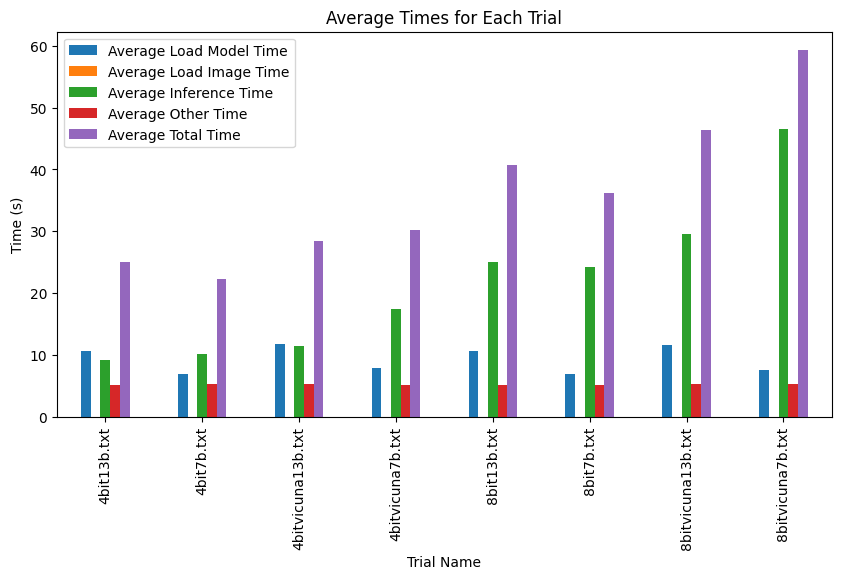

In [92]:
import matplotlib.pyplot as plt
df.plot.bar(x="Trial Name", y=["Average Load Model Time", "Average Load Image Time", "Average Inference Time", "Average Other Time", "Average Total Time"], figsize=(10, 5), title="Average Times for Each Trial")
plt.xlabel("Trial Name")
plt.ylabel("Time (s)")

#save the figure with no cutoff
plt.savefig("average_times.png", bbox_inches='tight')

In [93]:
#remove the column "Trial Name" and save to csv
df.to_csv("llava_time_trials.csv", index=False)
